Shape of training set: (105, 2)
Shape of testing set: (45, 2)


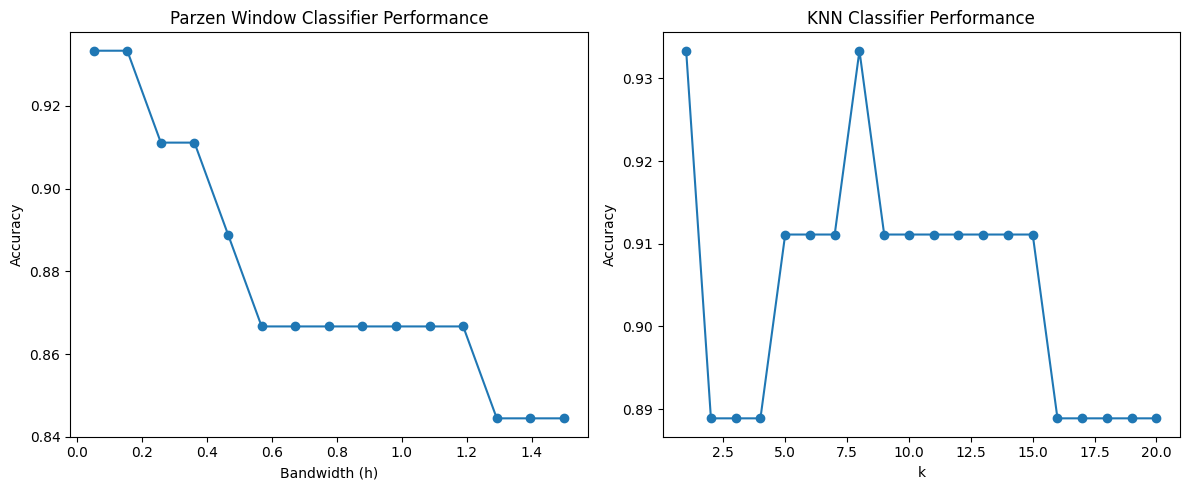

In [1]:
# ----------------------------------------
# Project Part-B Task-B: Parzen vs KNN
# Dataset: Iris Dataset
# ----------------------------------------

# Install scikit-learn if not available
!pip install -q scikit-learn

# 1. Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# 2. Load Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# 3. Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optionally reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

print(f"Shape of training set: {X_train.shape}")
print(f"Shape of testing set: {X_test.shape}")

# 4. Parzen Window Classifier
class ParzenWindowClassifier:
    def __init__(self, bandwidth=0.5):
        self.bandwidth = bandwidth

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.classes = np.unique(y)

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            densities = []
            for cls in self.classes:
                X_cls = self.X_train[self.y_train == cls]
                density = np.sum(
                    multivariate_normal(mean=x, cov=self.bandwidth**2 * np.eye(x.shape[0])).pdf(X_cls)
                ) / X_cls.shape[0]
                densities.append(density)
            predictions.append(np.argmax(densities))
        return np.array(predictions)

# 5. Train and Evaluate Parzen
bandwidths = np.linspace(0.05, 1.5, 15)
parzen_accuracies = []

for bw in bandwidths:
    parzen = ParzenWindowClassifier(bandwidth=bw)
    parzen.fit(X_train, y_train)
    y_pred = parzen.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    parzen_accuracies.append(acc)

# 6. Train and Evaluate KNN
k_values = range(1, 21)
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)

# 7. Plot Accuracies
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(bandwidths, parzen_accuracies, marker='o')
plt.xlabel('Bandwidth (h)')
plt.ylabel('Accuracy')
plt.title('Parzen Window Classifier Performance')

plt.subplot(1,2,2)
plt.plot(k_values, knn_accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Performance')

plt.tight_layout()
plt.show()


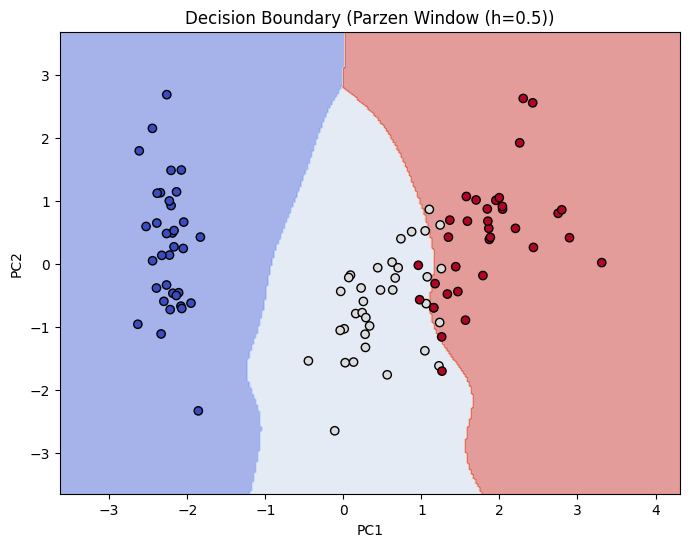

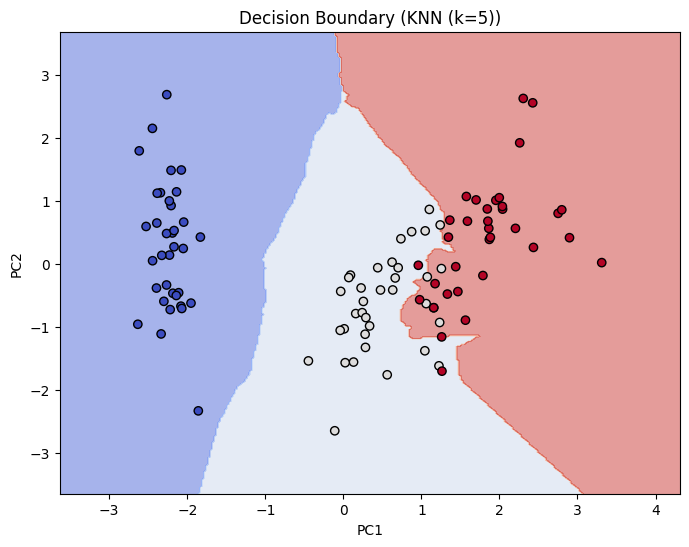

In [2]:
# ----------------------------------------
# Visualize Decision Boundaries
# ----------------------------------------

def plot_decision_boundary(model, X, y, model_name="Classifier"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]

    preds = model.predict(grid)
    preds = preds.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, preds, alpha=0.5, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(f"Decision Boundary ({model_name})")
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

# Train Parzen and KNN on the full data
parzen_final = ParzenWindowClassifier(bandwidth=0.5)
parzen_final.fit(X_train, y_train)

knn_final = KNeighborsClassifier(n_neighbors=5)
knn_final.fit(X_train, y_train)

# Plot
plot_decision_boundary(parzen_final, X_train, y_train, model_name="Parzen Window (h=0.5)")
plot_decision_boundary(knn_final, X_train, y_train, model_name="KNN (k=5)")
